In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("data/sentimentdataset.csv")

## Data cleaning

In [3]:
def sentiment_map(sentiment: str):
    sentiment = sentiment.strip()
    sentiment = sentiment.lower()

    if sentiment in ["ecstasy", "delight", "dazzle", "bliss", "cheerfulness", "satisfaction", "positive", "joy", "happiness", "happy"]:
        return "Joy/ Happiness"
    elif sentiment in ["admiration", "fondness", "adoration", "attraction", "tenderness", "love", "affection"]:
        return "Love/ Affection"
    elif sentiment in ["confidence", "acceptance", "reliability", "comfort", "safety", "trust"]:
        return "Trust"
    elif sentiment in ["hope", "excitement", "eagerness", "vigilance", "curiosity", "anticipation"]:
        return "Anticipation"
    elif sentiment in ["indifference", "neutrality", "contentment", "relaxation", "neutral", "calm"]:
        return "Neutral/ Calm"
    elif sentiment in ["amazement", "astonishment", "shock", "awe", "confusion", "surprise"]:
        return "Surprise"
    elif sentiment in ["anxiety", "terror", "worry", "dread", "panic", "fear"]:
        return "Fear"
    elif sentiment in ["revulsion", "contempt", "loathing", "aversion", "distaste", "disgust"]:
        return "Disgust"
    elif sentiment in ["rage", "fury", "frustration", "resentment", "bitterness", "anger"]:
        return "Anger"
    elif sentiment in ["sorrow", "melancholy", "grief", "loneliness", "despair", "negative", "sadness"]:
        return "Sadness"
    # elif sentiment in ...

    # raise Exception(f"This is not mapped: {sentiment}")
    
    return 'no category'

In [4]:
df['GeneralSentiment'] = df['Sentiment'].apply(sentiment_map)

In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Weekday'] = pd.Categorical(df['Timestamp'].dt.day_name(), categories=day_order, ordered=True)


In [6]:
df['Country'] = df['Country'].apply(lambda s: s.strip())

In [7]:
df['Platform'] = df['Platform'].apply(lambda s: s.strip())

In [8]:
df['TextLength'] = df['Text'].apply(lambda s: len(s.strip()))

## Data analysis

In [9]:
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,GeneralSentiment,Weekday,TextLength
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,Joy/ Happiness,Sunday,37
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,Sadness,Sunday,34
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,Joy/ Happiness,Sunday,35
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,Joy/ Happiness,Sunday,43
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,Neutral/ Calm,Sunday,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18,Joy/ Happiness,Friday,109
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14,Joy/ Happiness,Friday,105
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17,Joy/ Happiness,Friday,98
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20,Joy/ Happiness,Saturday,103


### Number of posts per sentiment

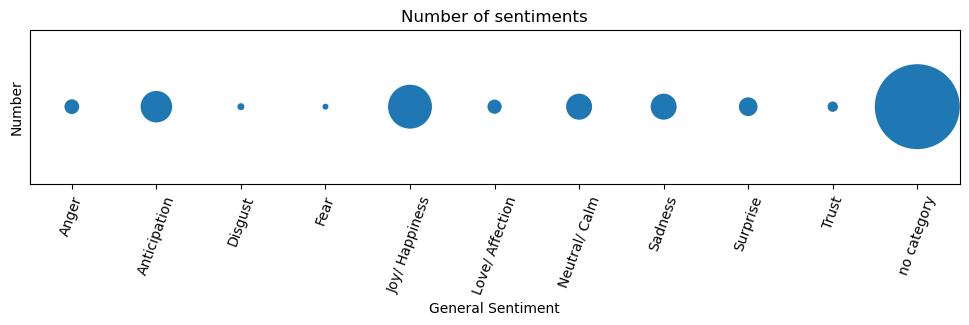

In [10]:
general_sentiment_counts = df.groupby(df['GeneralSentiment']).size()

sentiments = general_sentiment_counts.index
counts = general_sentiment_counts.values

plt.figure(figsize=(12, 2))
plt.scatter(sentiments, [1] * len(sentiments), s=counts * 10, edgecolors='w', linewidth=2)

plt.title('Number of sentiments')
plt.xlabel('General Sentiment')
plt.yticks([])
plt.ylabel('Number')
plt.xticks(rotation=70)

plt.show()

### Number of posts per time for every sentiment

In [11]:
hourly_sentiment = df.groupby(df['Hour'])['GeneralSentiment'].value_counts().unstack().fillna(0)
weekday_sentiment = df.groupby(df['Weekday'])['GeneralSentiment'].value_counts().unstack().fillna(0)
monthly_sentiment = df.groupby(df['Month'])['GeneralSentiment'].value_counts().unstack().fillna(0)
yearly_sentiment = df.groupby(df['Year'])['GeneralSentiment'].value_counts().unstack().fillna(0)

/var/folders/l8/4c2yk26x4wb5hc7974w49mvc0000gq/T/ipykernel_98372/1819215823.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_sentiment = df.groupby(df['Weekday'])['GeneralSentiment'].value_counts().unstack().fillna(0)


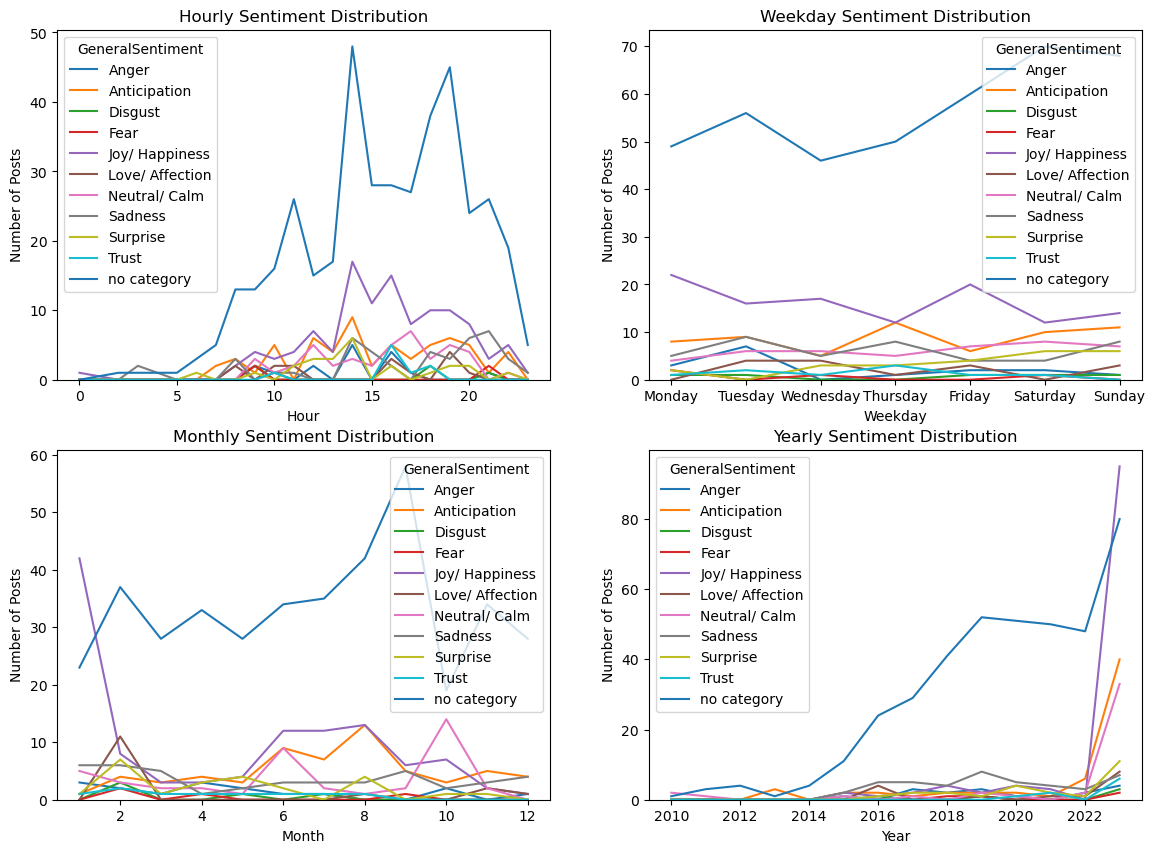

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

hourly_sentiment.plot(kind='line', ax=axs[0, 0])
axs[0, 0].set_title('Hourly Sentiment Distribution')
axs[0, 0].set_xlabel('Hour')
axs[0, 0].set_ylabel('Number of Posts')
axs[0, 0].legend(title='GeneralSentiment')
axs[0, 0].set_ylim(bottom=0)

weekday_sentiment.plot(kind='line', ax=axs[0, 1])
axs[0, 1].set_title('Weekday Sentiment Distribution')
axs[0, 1].set_xlabel('Weekday')
axs[0, 1].set_ylabel('Number of Posts')
axs[0, 1].legend(title='GeneralSentiment')
axs[0, 1].set_ylim(bottom=0)

monthly_sentiment.plot(kind='line', ax=axs[1, 0])
axs[1, 0].set_title('Monthly Sentiment Distribution')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Number of Posts')
axs[1, 0].legend(title='GeneralSentiment')
axs[1, 0].set_ylim(bottom=0)

yearly_sentiment.plot(kind='line', ax=axs[1, 1])
axs[1, 1].set_title('Yearly Sentiment Distribution')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Number of Posts')
axs[1, 1].legend(title='GeneralSentiment')
axs[1, 1].set_ylim(bottom=0)

plt.show()

### Number of posts per time

In [13]:
hourly_posts = df.groupby(df['Hour']).size()
weekday_posts = df.groupby(df['Weekday']).size()
monthly_posts = df.groupby(df['Month']).size()
yearly_posts = df.groupby(df['Year']).size()

/var/folders/l8/4c2yk26x4wb5hc7974w49mvc0000gq/T/ipykernel_98372/2275757461.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_posts = df.groupby(df['Weekday']).size()


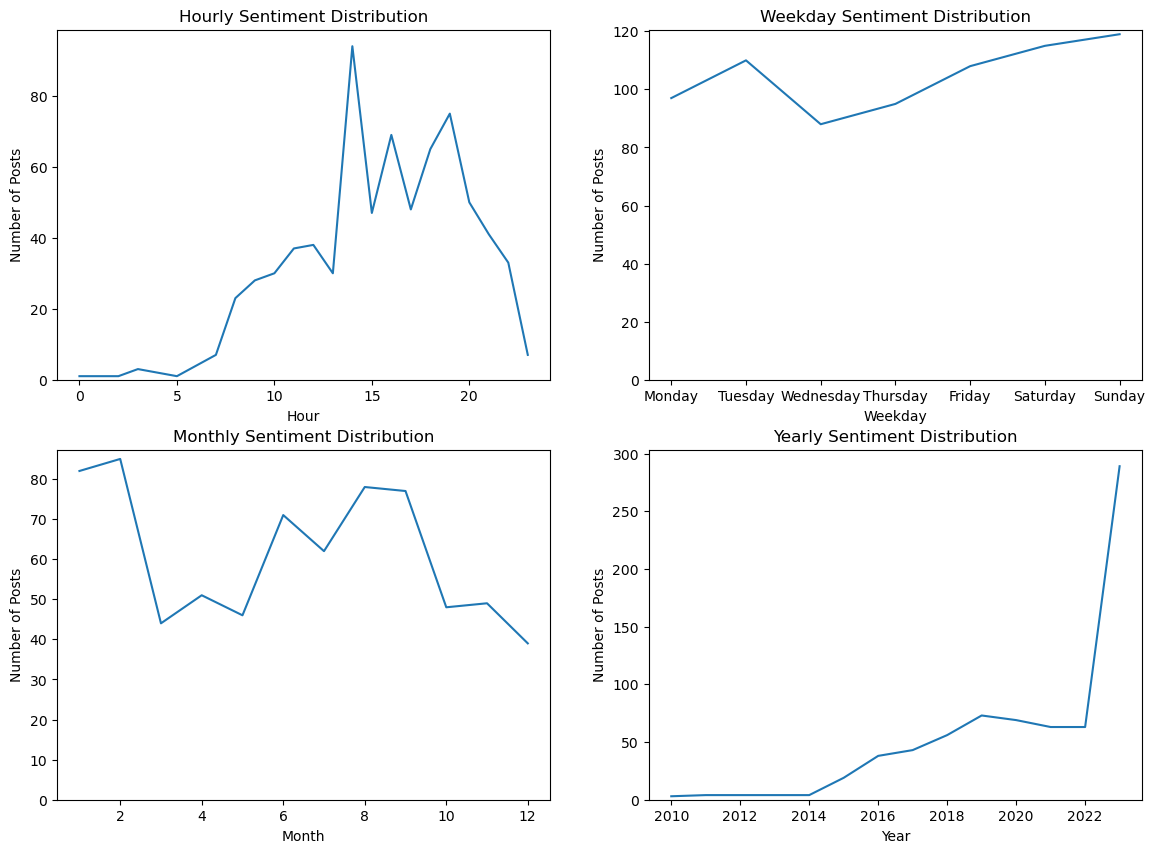

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

hourly_posts.plot(kind='line', ax=axs[0, 0])
axs[0, 0].set_title('Hourly Sentiment Distribution')
axs[0, 0].set_xlabel('Hour')
axs[0, 0].set_ylabel('Number of Posts')
axs[0, 0].set_ylim(bottom=0)

weekday_posts.plot(kind='line', ax=axs[0, 1])
axs[0, 1].set_title('Weekday Sentiment Distribution')
axs[0, 1].set_xlabel('Weekday')
axs[0, 1].set_ylabel('Number of Posts')
axs[0, 1].set_ylim(bottom=0)

monthly_posts.plot(kind='line', ax=axs[1, 0])
axs[1, 0].set_title('Monthly Sentiment Distribution')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Number of Posts')
axs[1, 0].set_ylim(bottom=0)

yearly_posts.plot(kind='line', ax=axs[1, 1])
axs[1, 1].set_title('Yearly Sentiment Distribution')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Number of Posts')
axs[1, 1].set_ylim(bottom=0)

plt.show()

### Number of posts per country for every sentiment

In [15]:
country_sentiment = df.groupby(df['Country'])['GeneralSentiment'].value_counts().unstack().fillna(0)

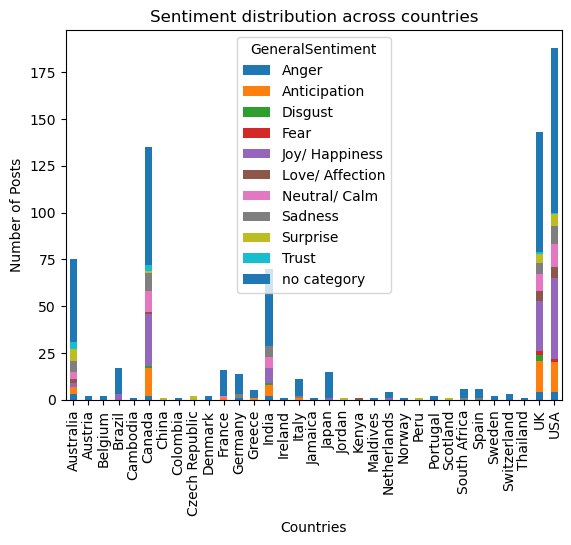

In [16]:
country_sentiment.plot(kind='bar', stacked=True)
plt.title('Sentiment distribution across countries')
plt.xlabel('Countries')
plt.ylabel('Number of Posts')
plt.legend(title='GeneralSentiment')
plt.ylim(bottom=0)

plt.show()

### Sentiments per countries

In [17]:
country_posts = df.groupby(df['Sentiment']).size()

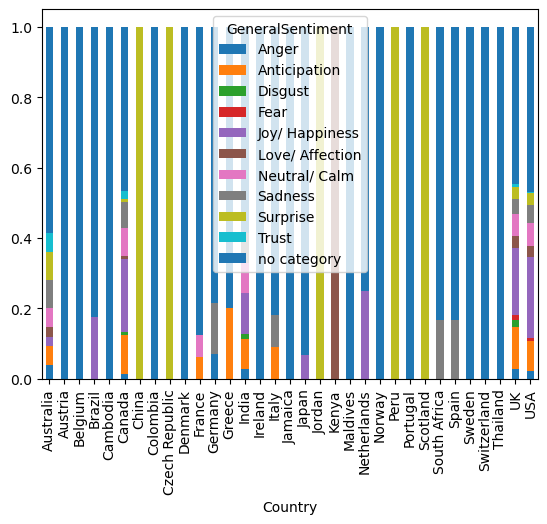

In [18]:
normalized_country_sentiment = country_sentiment.div(country_sentiment.sum(axis=1), axis=0)

normalized_country_sentiment.plot(kind='bar', stacked=True)

plt.show()

### Sentiments per platform

In [19]:
platform_sentiment = df.groupby(df['Platform'])['GeneralSentiment'].value_counts().unstack().fillna(0).T

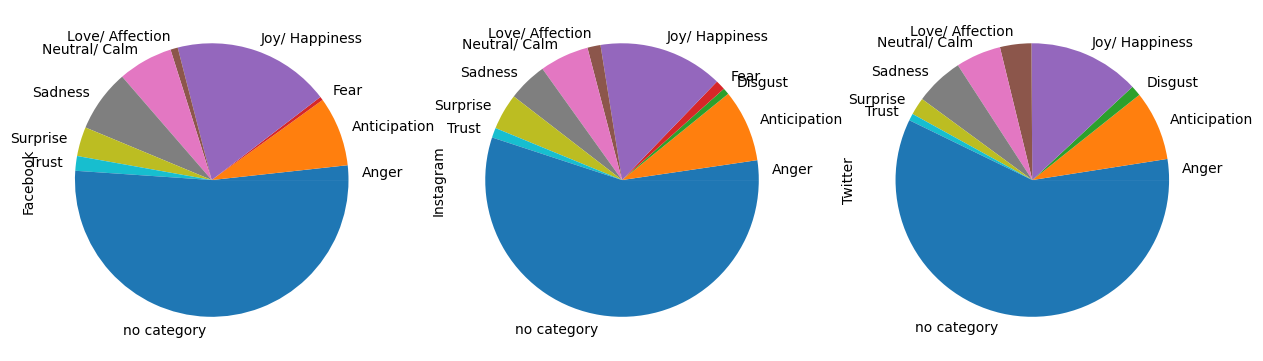

In [20]:
platform_sentiment.plot(kind='pie', subplots=True, legend=False, figsize=(15, 15))

plt.show()

### Average number of likes compared to the sentiments

In [21]:
average_like_number = df.groupby('GeneralSentiment')['Likes'].mean()

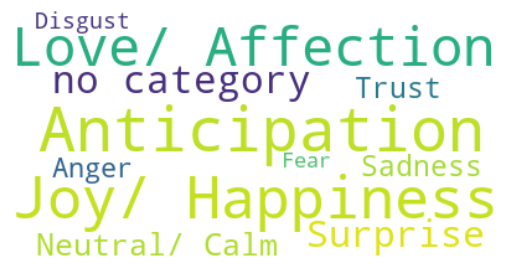

In [22]:
wc = WordCloud(background_color="white")
wc.generate_from_frequencies(average_like_number.to_dict())

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.show()

### Average number of retweets compared to the sentiments

In [23]:
average_retweet_number = df.groupby('GeneralSentiment')['Retweets'].mean()

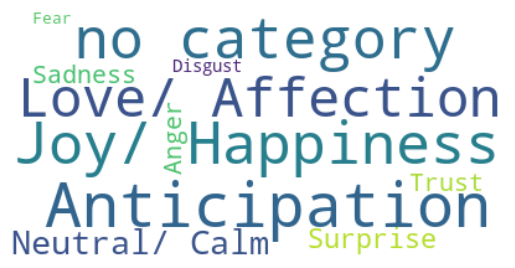

In [24]:
wc = WordCloud(background_color="white")
wc.generate_from_frequencies(average_retweet_number.to_dict())

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

plt.show()

### Length of text compared to the sentiments

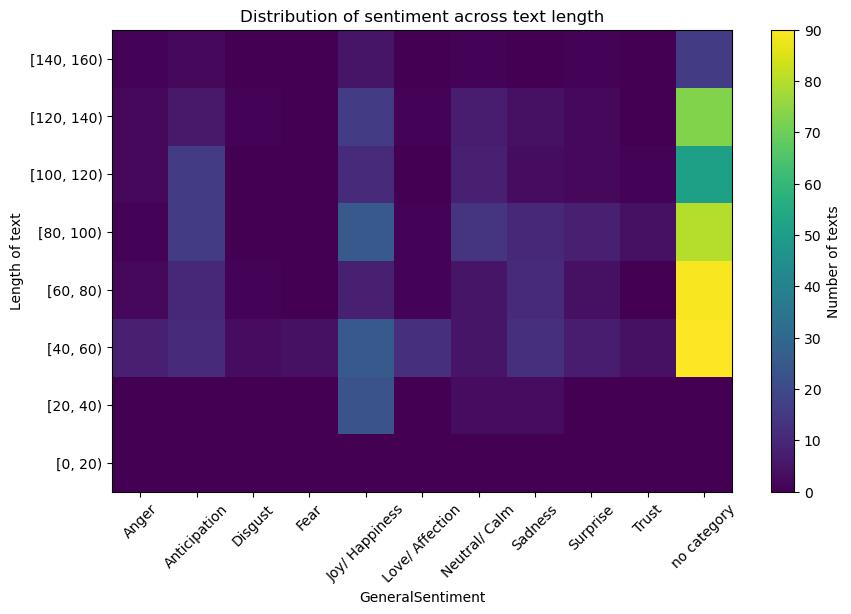

In [25]:
df['length_bin'] = pd.cut(df['TextLength'], bins=np.arange(0, df['TextLength'].max() + 20, 20), right=False, include_lowest=True)

pivot_table = df.pivot_table(index='length_bin', columns='GeneralSentiment', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))

plt.imshow(pivot_table, aspect='auto')

plt.xticks(ticks=np.arange(len(pivot_table.columns)), labels=pivot_table.columns, rotation=45)
plt.yticks(ticks=np.arange(len(pivot_table.index)), labels=[str(interval) for interval in pivot_table.index])

plt.gca().invert_yaxis()
plt.colorbar(label='Number of texts')

plt.title('Distribution of sentiment across text length')
plt.xlabel('GeneralSentiment')
plt.ylabel('Length of text')

plt.show()